## Financial Programming - Group Project - Financial Data Set   

Group Members : ABOUDI Arajem, GAILLARD Paul, JACOBSEN Benjamin

Importing the External libraries

In [1]:
# Import libraries
import numpy as np               # Arrary
import pandas as pd              # DataFrame
import matplotlib.pyplot as plt  # Plotting
# Turn off some annoying warnings
import warnings
warnings.filterwarnings('ignore')
from datetime import date

## PART 1
#### CREATION OF THE BASETABLE

In [2]:
#Read the data

#C:\Users\pgaillard\Desktop\Python\FP_GroupProject_GroupXX
#Each record describes characteristics of a client
client = pd.read_csv('C:/Users/pgaillard/Desktop/Financial Programing Final Project/data/raw/data_berka/client.asc', sep=';')

# Each record describes static characteristics of an account
account = pd.read_csv('C:/Users/pgaillard/Desktop/Financial Programing Final Project/data/raw/data_berka/account.asc', sep=';')

# Each record describes a credit card issued to an account
card = pd.read_csv('C:/Users/pgaillard/Desktop/Financial Programing Final Project/data/raw/data_berka/card.asc', sep=';')

# Each record describes demographic characteristics of a district
district = pd.read_csv('C:/Users/pgaillard/Desktop/Financial Programing Final Project/data/raw/data_berka/district.asc', sep=';')

# Each record relates together a client with an account
# i.e. this relation describes the rights of clients to operate accounts
disp = pd.read_csv('C:/Users/pgaillard/Desktop/Financial Programing Final Project/data/raw/data_berka/disp.asc', sep=';')

# Each record describes characteristics of a payment order (debits only)
order = pd.read_csv('C:/Users/pgaillard/Desktop/Financial Programing Final Project/data/raw/data_berka/order.asc', sep=';')

# Each record describes one transaction on an account
trans = pd.read_csv('C:/Users/pgaillard/Desktop/Financial Programing Final Project/data/raw/data_berka/trans.asc', sep=';', low_memory=False)

# Each record describes a loan granted for a given account
loan = pd.read_csv('C:/Users/pgaillard/Desktop/Financial Programing Final Project/data/raw/data_berka/loan.asc', sep=';')

# We have to merge trans (without filtered for 96) with account and then with disp, rename two variables name
# Then we can filter for 96 and recompute the RFM.
basetable = pd.read_csv('C:/Users/pgaillard/Desktop/Python/FP_GroupProject_GroupXX/finalbasetable_python.csv', sep=',')

#### 1. Merging "trans" and 'account' datasets.
The 'trans' dataset is merged with the 'account' dataset on the 'account_id' column using a left join.

This ensures that all records from the 'trans' dataset are retained, while only matching records from the 'account' dataset are included.

In [3]:
one = pd.merge(trans, account, on='account_id', how='left') # The left join is appropriate here to preserve transaction data, 
                                                              # even if there are missing or unmatched account details.
one

,trans_id,account_id,date_x,type,operation,amount,balance,k_symbol,bank,account,district_id,frequency,date_y
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN,16,POPLATEK MESICNE,930101
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN,55,POPLATEK MESICNE,930101
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN,55,POPLATEK MESICNE,930101
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN,74,POPLATEK MESICNE,930101
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN,77,POPLATEK MESICNE,930102
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056315,3626622,2906,981231,PRIJEM,NaN,62.3,13729.4,UROK,NaN,NaN,49,POPLATEK MESICNE,960920
1056316,3627616,2935,981231,PRIJEM,NaN,81.3,19544.9,UROK,NaN,NaN,68,POPLATEK MESICNE,950515
1056317,3625403,2869,981231,PRIJEM,NaN,60.2,14638.2,UROK,NaN,NaN,68,POPLATEK MESICNE,960927
1056318,3626683,2907,981231,PRIJEM,NaN,107.5,23453.0,UROK,NaN,NaN,70,POPLATEK MESICNE,930909


#### 2. Merging the previously created table with the 'disp' dataset.
This step adds additional details from the 'disp' dataset to the existing merged dataset while preserving all records from the table 'one'.

In [4]:
# Step 2: Merging 'step1' with the 'disp' dataset

two = pd.merge(one, disp, on='account_id', how='left') #merged on the 'account_id' column using a left join.

# Renaming Columns for Clarity
two = two.rename(columns={
    'type_x': 'type_account',
    'type_y': 'type_client',
    'date_x': 'date_trans',
    'date_y': 'date_account'
})
two

,trans_id,account_id,date_trans,type_account,operation,amount,balance,k_symbol,bank,account,district_id,frequency,date_account,disp_id,client_id,type_client
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN,16,POPLATEK MESICNE,930101,2873,2873,OWNER
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN,55,POPLATEK MESICNE,930101,692,692,OWNER
2,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN,55,POPLATEK MESICNE,930101,693,693,DISPONENT
3,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN,55,POPLATEK MESICNE,930101,844,844,OWNER
4,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN,55,POPLATEK MESICNE,930101,845,845,DISPONENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262620,3627616,2935,981231,PRIJEM,NaN,81.3,19544.9,UROK,NaN,NaN,68,POPLATEK MESICNE,950515,3545,3545,OWNER
1262621,3625403,2869,981231,PRIJEM,NaN,60.2,14638.2,UROK,NaN,NaN,68,POPLATEK MESICNE,960927,3468,3468,OWNER
1262622,3626683,2907,981231,PRIJEM,NaN,107.5,23453.0,UROK,NaN,NaN,70,POPLATEK MESICNE,930909,3513,3513,OWNER
1262623,3626683,2907,981231,PRIJEM,NaN,107.5,23453.0,UROK,NaN,NaN,70,POPLATEK MESICNE,930909,3514,3514,DISPONENT


#### Filtering Transactions from the Year 1996
The 'step2' dataset is filtered to include only rows where the 'date_trans' column indicates transactions from the year 1996.

This is achieved by converting the 'date_trans' column to a string, extracting the first two characters (representing the year in YY format),
and checking if they match '96'.

The result is stored in a new DataFrame called 'trans96', which contains only transactions from 1996.

In [5]:
trans96 = two[two['date_trans'].astype(str).str[:2].isin(['96'])]
trans96

,trans_id,account_id,date_trans,type_account,operation,amount,balance,k_symbol,bank,account,district_id,frequency,date_account,disp_id,client_id,type_client
304624,732811,2504,960101,VYDAJ,VYBER KARTOU,900.0,38124.4,NaN,NaN,0.0,16,POPLATEK MESICNE,931209,3023,3023,OWNER
304625,800209,2729,960101,VYDAJ,VYBER,1920.0,34202.7,NaN,NaN,NaN,40,POPLATEK MESICNE,950116,3295,3295,OWNER
304626,803553,2738,960101,VYDAJ,VYBER,6500.0,25685.2,NaN,NaN,NaN,41,POPLATEK MESICNE,931112,3305,3305,OWNER
304627,1042686,3566,960101,VYDAJ,VYBER,1000.0,25919.7,NaN,NaN,NaN,21,POPLATEK MESICNE,930609,4303,4303,OWNER
304628,1042689,3566,960101,VYDAJ,VYBER,500.0,25419.7,NaN,NaN,NaN,21,POPLATEK MESICNE,930609,4303,4303,OWNER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539043,516262,1765,961231,VYDAJ,VYBER,14.6,19708.1,SLUZBY,NaN,NaN,18,POPLATEK MESICNE,960721,2139,2139,OWNER
539044,516262,1765,961231,VYDAJ,VYBER,14.6,19708.1,SLUZBY,NaN,NaN,18,POPLATEK MESICNE,960721,2140,2140,DISPONENT
539045,520019,1775,961231,VYDAJ,VYBER,14.6,15944.5,SLUZBY,NaN,NaN,17,POPLATEK MESICNE,930227,2152,2152,OWNER
539046,517894,1769,961231,VYDAJ,VYBER,14.6,34679.4,SLUZBY,NaN,NaN,39,POPLATEK MESICNE,950125,2145,2145,OWNER


In [6]:
# Converting 'date_trans' to Datetime Format
# This ensures the column is in a standard date format, enabling proper sorting and date manipulations.
trans96['date_trans'] = pd.to_datetime(trans96['date_trans'], format='%y%m%d')


# A new DataFrame 'LastPurchaseOrder' is created, containing only 'account_id' and 'date_trans' columns,
# as these are the relevant fields for determining the latest purchase date for each account.
LastPurchaseOrder = trans96[['account_id', 'date_trans']]


# Sorting ensures that when duplicates are removed, the first occurrence is the latest transaction date.
LastPurchaseOrder.sort_values(by='date_trans', ascending=False, inplace=True)

# Dropping Duplicates to Keep Only the Latest Transaction for Each Account
# Duplicate entries for the same 'account_id' are removed, retaining only the first occurrence,
# which corresponds to the latest transaction date due to the previous sorting step.
last_purchase_dates = LastPurchaseOrder.drop_duplicates(subset='account_id')

# Renaming Columns for Clarity
# The 'date_trans' column is renamed to 'last_purchase_date' to clearly indicate its meaning.
last_purchase_dates.columns = ['account_id', 'last_purchase_date']


last_purchase_dates


,account_id,last_purchase_date
539047,1770,1996-12-31
533812,3040,1996-12-31
533814,3098,1996-12-31
533815,3066,1996-12-31
533816,3015,1996-12-31
...,...,...
488936,3139,1996-10-31
454337,1720,1996-09-07
447682,3823,1996-08-31
443236,799,1996-08-25


#### The next step: Merging 'last_purchase_dates' with 'trans96'.

This operation adds the 'last_purchase_date' information to each transaction record in 'trans96'.

In [7]:
trans96 = pd.merge(last_purchase_dates, trans96, on='account_id') # The merge is performed on the 'account_id' column
trans96


,account_id,last_purchase_date,trans_id,date_trans,type_account,operation,amount,balance,k_symbol,bank,account,district_id,frequency,date_account,disp_id,client_id,type_client
0,1770,1996-12-31,518097,1996-01-05,VYDAJ,PREVOD NA UCET,8351.0,47366.9,SIPO,EF,27800739.0,65,POPLATEK MESICNE,940208,2146,2146,OWNER
1,1770,1996-12-31,518163,1996-01-05,VYDAJ,VYBER,2600.0,55717.9,NaN,NaN,NaN,65,POPLATEK MESICNE,940208,2146,2146,OWNER
2,1770,1996-12-31,518037,1996-01-10,PRIJEM,VKLAD,21017.0,68383.9,NaN,NaN,NaN,65,POPLATEK MESICNE,940208,2146,2146,OWNER
3,1770,1996-12-31,518161,1996-01-13,VYDAJ,VYBER,2100.0,66283.9,NaN,NaN,NaN,65,POPLATEK MESICNE,940208,2146,2146,OWNER
4,1770,1996-12-31,518160,1996-01-13,VYDAJ,VYBER,2700.0,63583.9,NaN,NaN,NaN,65,POPLATEK MESICNE,940208,2146,2146,OWNER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234419,799,1996-08-25,3556571,1996-04-30,PRIJEM,NaN,63.8,11648.3,UROK,NaN,NaN,56,POPLATEK MESICNE,931010,957,957,OWNER
234420,799,1996-08-25,3556571,1996-04-30,PRIJEM,NaN,63.8,11648.3,UROK,NaN,NaN,56,POPLATEK MESICNE,931010,958,958,DISPONENT
234421,799,1996-08-25,234606,1996-08-25,VYDAJ,VYBER,2300.0,9348.3,NaN,NaN,NaN,56,POPLATEK MESICNE,931010,957,957,OWNER
234422,799,1996-08-25,234606,1996-08-25,VYDAJ,VYBER,2300.0,9348.3,NaN,NaN,NaN,56,POPLATEK MESICNE,931010,958,958,DISPONENT


In [8]:
# Converting Dates to Datetime Format
# Both 'date_trans' and 'last_purchase_date' columns are converted to datetime format to ensure proper date calculations.
trans96['date_trans'] = pd.to_datetime(trans96['date_trans'])
trans96['last_purchase_date'] = pd.to_datetime(trans96['last_purchase_date'])

# Calculating Reference Date
# The latest transaction date in the 'date_trans' column is identified and set as the reference date ('max_date').
# This is used to calculate the recency of transactions.
max_date = trans96['date_trans'].max()

# Calculating Recency
# Recency is calculated as the difference between the 'reference_date' (latest transaction date in the dataset)
# and the 'last_purchase_date' for each account.
trans96['reference_date'] = max_date
trans96['recency'] = trans96['reference_date'] - trans96['last_purchase_date']

# Calculating Frequency
# Frequency is calculated as the number of transactions per account ('account_id').
frequency = trans96.groupby('account_id').size().reset_index(name='frequency')

# Calculating Monetary Value
# Monetary value is calculated as the total transaction amount ('amount') for each account ('account_id').
monetary = trans96.groupby('account_id')['amount'].sum().reset_index(name='monetary')

# Dropping Unnecessary Columns
# The 'last_purchase_date' column is dropped from the 'trans96' DataFrame as it is no longer needed after calculating recency.
trans96 = trans96.drop(['last_purchase_date'], axis=1)
trans96


,account_id,trans_id,date_trans,type_account,operation,amount,balance,k_symbol,bank,account,district_id,frequency,date_account,disp_id,client_id,type_client,reference_date,recency
0,1770,518097,1996-01-05,VYDAJ,PREVOD NA UCET,8351.0,47366.9,SIPO,EF,27800739.0,65,POPLATEK MESICNE,940208,2146,2146,OWNER,1996-12-31,0 days
1,1770,518163,1996-01-05,VYDAJ,VYBER,2600.0,55717.9,NaN,NaN,NaN,65,POPLATEK MESICNE,940208,2146,2146,OWNER,1996-12-31,0 days
2,1770,518037,1996-01-10,PRIJEM,VKLAD,21017.0,68383.9,NaN,NaN,NaN,65,POPLATEK MESICNE,940208,2146,2146,OWNER,1996-12-31,0 days
3,1770,518161,1996-01-13,VYDAJ,VYBER,2100.0,66283.9,NaN,NaN,NaN,65,POPLATEK MESICNE,940208,2146,2146,OWNER,1996-12-31,0 days
4,1770,518160,1996-01-13,VYDAJ,VYBER,2700.0,63583.9,NaN,NaN,NaN,65,POPLATEK MESICNE,940208,2146,2146,OWNER,1996-12-31,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234419,799,3556571,1996-04-30,PRIJEM,NaN,63.8,11648.3,UROK,NaN,NaN,56,POPLATEK MESICNE,931010,957,957,OWNER,1996-12-31,128 days
234420,799,3556571,1996-04-30,PRIJEM,NaN,63.8,11648.3,UROK,NaN,NaN,56,POPLATEK MESICNE,931010,958,958,DISPONENT,1996-12-31,128 days
234421,799,234606,1996-08-25,VYDAJ,VYBER,2300.0,9348.3,NaN,NaN,NaN,56,POPLATEK MESICNE,931010,957,957,OWNER,1996-12-31,128 days
234422,799,234606,1996-08-25,VYDAJ,VYBER,2300.0,9348.3,NaN,NaN,NaN,56,POPLATEK MESICNE,931010,958,958,DISPONENT,1996-12-31,128 days


#### 3. Adding some other features 

In [9]:
# Merging Frequency Data 
# The 'frequency' DataFrame,is merged into the 'trans96' DataFrame. 
trans96 = trans96.merge(frequency, on='account_id', how='left')   #This adds a 'frequency' column to the 'trans96' dataset.

# Merging Monetary Data
# The 'monetary' DataFrame, is merged into the 'trans96' DataFrame. 
trans96 = trans96.merge(monetary, on='account_id', how='left')    #This adds a 'monetary' column to the 'trans96' dataset.

# Renaming Frequency Columns for Consistency
trans96 = trans96.rename(columns={
    'frequency_x': 'freq',
    'frequency_y': 'frequency'
})



In [10]:
#Dropping  Unnecessary Columns.
trans96=trans96.drop(['freq','operation'],axis=1)
trans96

,account_id,trans_id,date_trans,type_account,amount,balance,k_symbol,bank,account,district_id,date_account,disp_id,client_id,type_client,reference_date,recency,frequency,monetary
0,1770,518097,1996-01-05,VYDAJ,8351.0,47366.9,SIPO,EF,27800739.0,65,940208,2146,2146,OWNER,1996-12-31,0 days,75,542819.3
1,1770,518163,1996-01-05,VYDAJ,2600.0,55717.9,NaN,NaN,NaN,65,940208,2146,2146,OWNER,1996-12-31,0 days,75,542819.3
2,1770,518037,1996-01-10,PRIJEM,21017.0,68383.9,NaN,NaN,NaN,65,940208,2146,2146,OWNER,1996-12-31,0 days,75,542819.3
3,1770,518161,1996-01-13,VYDAJ,2100.0,66283.9,NaN,NaN,NaN,65,940208,2146,2146,OWNER,1996-12-31,0 days,75,542819.3
4,1770,518160,1996-01-13,VYDAJ,2700.0,63583.9,NaN,NaN,NaN,65,940208,2146,2146,OWNER,1996-12-31,0 days,75,542819.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234419,799,3556571,1996-04-30,PRIJEM,63.8,11648.3,UROK,NaN,NaN,56,931010,957,957,OWNER,1996-12-31,128 days,14,20782.8
234420,799,3556571,1996-04-30,PRIJEM,63.8,11648.3,UROK,NaN,NaN,56,931010,958,958,DISPONENT,1996-12-31,128 days,14,20782.8
234421,799,234606,1996-08-25,VYDAJ,2300.0,9348.3,NaN,NaN,NaN,56,931010,957,957,OWNER,1996-12-31,128 days,14,20782.8
234422,799,234606,1996-08-25,VYDAJ,2300.0,9348.3,NaN,NaN,NaN,56,931010,958,958,DISPONENT,1996-12-31,128 days,14,20782.8


#### 4. Aggregating Total Credit Per Account in 1996

In [11]:
# Filtering Transactions for 'PRIJEM' Account Type
# 'PRIJEM' likely represents a specific type of transaction (e.g., credit or income transactions).
# This step isolates transactions relevant for calculating total credit per account.

trans_agg_credit_96 = trans96[trans96['type_account'].isin(['PRIJEM'])]

# Aggregating Total Credit Per Account
# The total amount ('amount') for each 'account_id' is calculated using the 'sum' aggregation function.
trans_agg_credit_96 = trans_agg_credit_96.groupby('account_id')['amount'].agg('sum')
trans_agg_credit_96 = trans_agg_credit_96.reset_index()

# Renaming Column for Clarity
trans_agg_credit_96 = trans_agg_credit_96.rename(columns={'amount': 'total_credit96'})

trans_agg_credit_96.head(5)


,account_id,total_credit96
0,1,50066.0
1,2,577085.8
2,4,56920.5
3,6,81507.7
4,7,34905.4


#### 5. Aggregating Total Withdrawal Per Account in 1996

In [12]:
# Filtering Transactions for Withdrawal Account Types
# The 'trans96' DataFrame is filtered to include only rows where 'type_account' equals 'VYDAJ' or 'VYBER'.
# These account types likely represent withdrawal transactions (e.g., expenses or cash withdrawals).
trans_agg_withdrawal_96 = trans96[trans96['type_account'].isin(['VYDAJ', 'VYBER'])]

# Aggregating Total Withdrawal Per Account
# The total amount ('amount') for each 'account_id' is calculated using the 'sum' aggregation function.
trans_agg_withdrawal_96 = trans_agg_withdrawal_96.groupby('account_id')['amount'].agg('sum')
trans_agg_withdrawal_96 = trans_agg_withdrawal_96.reset_index()

# Renaming Column for Clarity
trans_agg_withdrawal_96 = trans_agg_withdrawal_96.rename(columns={'amount': 'total_withdrawal96'})

trans_agg_withdrawal_96.head(5)


,account_id,total_withdrawal96
0,1,55579.2
1,2,549148.4
2,4,31977.6
3,6,81803.2
4,7,6600.0


#### 6. Adding additional informations about the client (birth_year, birth_day, birth_month, gender, age, age group)

In [13]:
# Extracting Birth Year
client['birth_year'] = client['birth_number'].astype(str).str[:2].astype(int) + 1900

# Extracting Birth Day
client['birth_day'] = client['birth_number'].astype(str).str[4:].astype(int)

col = client['birth_number'].astype(str).str[2:4].astype(int)

# Assigning Birth Month
# For females (indicated by values > 50 in the 'col' variable), 50 is subtracted to determine the actual birth month.
# For males (values ≤ 50), the birth month remains unchanged.
client.loc[col > 50, 'birth_month'] = col - 50
client.loc[col <= 50, 'birth_month'] = col

# Converting Birth Month to Integer
client['birth_month'] = client['birth_month'].astype(int)

# Assigning Gender Based on Birth Month Modifier
# If 'col' > 50, the individual is female ('F'), otherwise male ('M').
client.loc[col > 50, 'gender'] = 'F'
client.loc[col <= 50, 'gender'] = 'M'

# Simplifying Gender and Birth Month with 'numpy'
# - Gender is 'F' if 'col' > 50, otherwise 'M'.
# - Birth month is adjusted by subtracting 50 if 'col' > 50, otherwise remains the same.
import numpy as np
client['gender'] = np.where(col > 50, 'F', 'M')
client['birth_month'] = np.where(col > 50, col - 50, col)

# Dropping Unnecessary Columns
client = client.drop(['birth_number'], axis=1)


client


,client_id,district_id,birth_year,birth_day,birth_month,gender
0,1,18,1970,13,12,F
1,2,1,1945,4,2,M
2,3,1,1940,9,10,F
3,4,5,1956,1,12,M
4,5,5,1960,3,7,F
...,...,...,...,...,...,...
5364,13955,1,1945,30,10,F
5365,13956,1,1943,6,4,M
5366,13968,61,1968,13,4,M
5367,13971,67,1962,19,10,F


In [14]:
# Computing Age
# The current year (1996) is used as a reference to calculate the age of each client.
current_year = 1996
client['age'] = current_year - client['birth_year']

# Computing Age Groups
# Clients are grouped into age brackets or decades (e.g., 20s, 30s, 40s, etc.).
client['age_group'] = (client["age"] // 10) * 10

client


,client_id,district_id,birth_year,birth_day,birth_month,gender,age,age_group
0,1,18,1970,13,12,F,26,20
1,2,1,1945,4,2,M,51,50
2,3,1,1940,9,10,F,56,50
3,4,5,1956,1,12,M,40,40
4,5,5,1960,3,7,F,36,30
...,...,...,...,...,...,...,...,...
5364,13955,1,1945,30,10,F,51,50
5365,13956,1,1943,6,4,M,53,50
5366,13968,61,1968,13,4,M,28,20
5367,13971,67,1962,19,10,F,34,30


#### This visualization shows the number of clients from each gender distribution per age group.

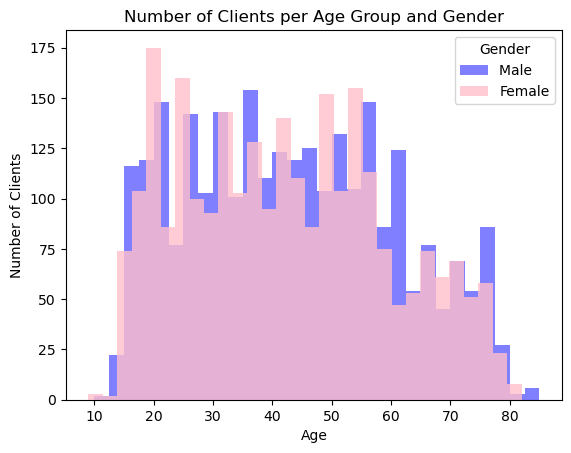

In [15]:

fig, ax = plt.subplots()

# Plot histograms for male and female groups
ax.hist(client.loc[client.gender == 'M', 'age'], bins=30, alpha=0.5, color='blue', label='Male ')
ax.hist(client.loc[client.gender == 'F', 'age'], bins=30, alpha=0.8, color='pink', label='Female')

ax.set_title('Number of Clients per Age Group and Gender')
ax.set_xlabel('Age')
ax.set_ylabel('Number of Clients')

ax.legend(title='Gender')

# Show the plot
plt.show()


In [16]:
# Creating the 'year' Column
account['year'] = account['date'].astype(str).str[:2].astype(int) + 1900

# Filtering Accounts with Year Before 1996
# The DataFrame is filtered to include only rows where the 'year' column has a value less than 1996.
df = account[account['year'] < 1996].copy(deep=True)  #the '.cpy(deep=True)' ensures prevention to unintentional modifications to 'account' dataframe
df.head()


,account_id,district_id,frequency,date,year
0,576,55,POPLATEK MESICNE,930101,1993
1,3818,74,POPLATEK MESICNE,930101,1993
2,704,55,POPLATEK MESICNE,930101,1993
3,2378,16,POPLATEK MESICNE,930101,1993
4,2632,24,POPLATEK MESICNE,930102,1993


In [17]:
# Adding Length of Relationship (LOR) - the difference between the reference year (1996) - Column
# and the year in which the account was created ('year' column).
df['LOR'] = 1996 - df['year']

df


,account_id,district_id,frequency,date,year,LOR
0,576,55,POPLATEK MESICNE,930101,1993,3
1,3818,74,POPLATEK MESICNE,930101,1993,3
2,704,55,POPLATEK MESICNE,930101,1993,3
3,2378,16,POPLATEK MESICNE,930101,1993,3
4,2632,24,POPLATEK MESICNE,930102,1993,3
...,...,...,...,...,...,...
2234,4462,73,POPLATEK TYDNE,951227,1995,1
2235,3814,74,POPLATEK MESICNE,951227,1995,1
2236,2780,63,POPLATEK MESICNE,951229,1995,1
2237,3273,74,POPLATEK MESICNE,951229,1995,1


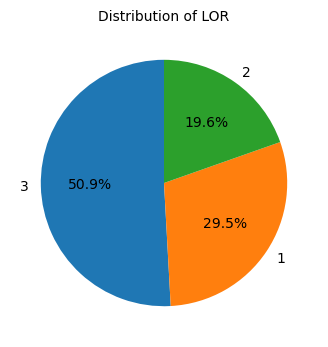

In [18]:
# Normalize Value Counts for 'LOR'
# The `value_counts` method is used to calculate the frequency of each unique value in the 'LOR' column.
ax = df['LOR'].value_counts(normalize=True)

# Plotting the Data as a Pie Chart
plt.figure(figsize=(6, 4))  
ax.plot(kind='pie', autopct='%1.1f%%', startangle=90)


plt.title('Distribution of LOR', fontsize=10)
plt.ylabel('')  
plt.show()

In [19]:
# Adding Information About Account Owners
# The 'df' DataFrame is merged with the 'disp' DataFrame to include only records where the 'type' column equals 'OWNER'.
df = pd.merge(df, disp[disp['type'] == 'OWNER'], how='left', on='account_id')

# Adding Client Information
# The 'df' DataFrame is further merged with the 'client' DataFrame to add detailed client information based on the 'client_id' column.
df = pd.merge(df, client, how='left', on='client_id')

# Renaming Columns for Clarity
df = df.rename(columns={
    'district_id_x': 'bank_district_id',
    'district_id_y': 'client_district_id'
})


In [20]:
#Drop Unnecessary Columns
df=df.drop(['frequency','type','birth_year','birth_day','birth_month'],axis=1)
df

,account_id,bank_district_id,date,year,LOR,disp_id,client_id,client_district_id,gender,age,age_group
0,576,55,930101,1993,3,692,692,74,F,60,60
1,3818,74,930101,1993,3,4601,4601,1,M,61,60
2,704,55,930101,1993,3,844,844,22,M,51,50
3,2378,16,930101,1993,3,2873,2873,16,F,21,20
4,2632,24,930102,1993,3,3177,3177,24,M,58,50
...,...,...,...,...,...,...,...,...,...,...,...
2234,4462,73,951227,1995,1,5384,5384,73,M,61,60
2235,3814,74,951227,1995,1,4596,4596,74,F,23,20
2236,2780,63,951229,1995,1,3357,3357,63,F,42,40
2237,3273,74,951229,1995,1,3962,3962,74,M,44,40


In [21]:
# Join with previous table
df = pd.merge(df, trans_agg_credit_96, how='left', on='account_id')
df = pd.merge(df, trans_agg_withdrawal_96, how='left', on='account_id')
df


,account_id,bank_district_id,date,year,LOR,disp_id,client_id,client_district_id,gender,age,age_group,total_credit96,total_withdrawal96
0,576,55,930101,1993,3,692,692,74,F,60,60,152194.6,140838.4
1,3818,74,930101,1993,3,4601,4601,1,M,61,60,469612.8,447070.4
2,704,55,930101,1993,3,844,844,22,M,51,50,457029.8,437062.4
3,2378,16,930101,1993,3,2873,2873,16,F,21,20,664545.4,633310.2
4,2632,24,930102,1993,3,3177,3177,24,M,58,50,186658.9,191071.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,4462,73,951227,1995,1,5384,5384,73,M,61,60,210483.6,187436.5
2235,3814,74,951227,1995,1,4596,4596,74,F,23,20,29400.0,3000.0
2236,2780,63,951229,1995,1,3357,3357,63,F,42,40,187419.5,154916.8
2237,3273,74,951229,1995,1,3962,3962,74,M,44,40,655807.8,611209.8


In [22]:
# Filtering Transactions to Match Accounts in 'df'
filtered_df = trans96[trans96['account_id'].isin(df['account_id'])]
filtered_df

,account_id,trans_id,date_trans,type_account,amount,balance,k_symbol,bank,account,district_id,date_account,disp_id,client_id,type_client,reference_date,recency,frequency,monetary
0,1770,518097,1996-01-05,VYDAJ,8351.0,47366.9,SIPO,EF,27800739.0,65,940208,2146,2146,OWNER,1996-12-31,0 days,75,542819.3
1,1770,518163,1996-01-05,VYDAJ,2600.0,55717.9,NaN,NaN,NaN,65,940208,2146,2146,OWNER,1996-12-31,0 days,75,542819.3
2,1770,518037,1996-01-10,PRIJEM,21017.0,68383.9,NaN,NaN,NaN,65,940208,2146,2146,OWNER,1996-12-31,0 days,75,542819.3
3,1770,518161,1996-01-13,VYDAJ,2100.0,66283.9,NaN,NaN,NaN,65,940208,2146,2146,OWNER,1996-12-31,0 days,75,542819.3
4,1770,518160,1996-01-13,VYDAJ,2700.0,63583.9,NaN,NaN,NaN,65,940208,2146,2146,OWNER,1996-12-31,0 days,75,542819.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234418,799,234605,1996-04-27,PRIJEM,1300.0,11584.5,NaN,NaN,NaN,56,931010,958,958,DISPONENT,1996-12-31,128 days,14,20782.8
234419,799,3556571,1996-04-30,PRIJEM,63.8,11648.3,UROK,NaN,NaN,56,931010,957,957,OWNER,1996-12-31,128 days,14,20782.8
234420,799,3556571,1996-04-30,PRIJEM,63.8,11648.3,UROK,NaN,NaN,56,931010,958,958,DISPONENT,1996-12-31,128 days,14,20782.8
234421,799,234606,1996-08-25,VYDAJ,2300.0,9348.3,NaN,NaN,NaN,56,931010,957,957,OWNER,1996-12-31,128 days,14,20782.8


In [23]:
# Filtering for Transactions by Account Owners
# The 'filtered_df' DataFrame is further filtered to include only rows where the 'type_client' column equals 'OWNER'.
filtered_df = filtered_df[filtered_df['type_client'] == 'OWNER']
filtered_df

,account_id,trans_id,date_trans,type_account,amount,balance,k_symbol,bank,account,district_id,date_account,disp_id,client_id,type_client,reference_date,recency,frequency,monetary
0,1770,518097,1996-01-05,VYDAJ,8351.0,47366.9,SIPO,EF,27800739.0,65,940208,2146,2146,OWNER,1996-12-31,0 days,75,542819.3
1,1770,518163,1996-01-05,VYDAJ,2600.0,55717.9,NaN,NaN,NaN,65,940208,2146,2146,OWNER,1996-12-31,0 days,75,542819.3
2,1770,518037,1996-01-10,PRIJEM,21017.0,68383.9,NaN,NaN,NaN,65,940208,2146,2146,OWNER,1996-12-31,0 days,75,542819.3
3,1770,518161,1996-01-13,VYDAJ,2100.0,66283.9,NaN,NaN,NaN,65,940208,2146,2146,OWNER,1996-12-31,0 days,75,542819.3
4,1770,518160,1996-01-13,VYDAJ,2700.0,63583.9,NaN,NaN,NaN,65,940208,2146,2146,OWNER,1996-12-31,0 days,75,542819.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234413,799,234604,1996-02-27,VYDAJ,4800.0,10220.8,NaN,NaN,NaN,56,931010,957,957,OWNER,1996-12-31,128 days,14,20782.8
234415,799,3556570,1996-02-29,PRIJEM,63.8,10284.5,UROK,NaN,NaN,56,931010,957,957,OWNER,1996-12-31,128 days,14,20782.8
234417,799,234605,1996-04-27,PRIJEM,1300.0,11584.5,NaN,NaN,NaN,56,931010,957,957,OWNER,1996-12-31,128 days,14,20782.8
234419,799,3556571,1996-04-30,PRIJEM,63.8,11648.3,UROK,NaN,NaN,56,931010,957,957,OWNER,1996-12-31,128 days,14,20782.8


#### 7. Grouping and Aggregating Data to have everything grouped by 'client_id' and 'type_client' 

In [24]:
grouped_df = filtered_df.groupby(['client_id', 'type_client']).agg({
    'monetary': 'sum',      # Sum up monetary values per client/type
    'frequency': 'mean',    # Calculate the average frequency per client/type
    'recency': 'count'      # Count the number of transactions per client/type
}).reset_index()

grouped_df

,client_id,type_client,monetary,frequency,recency
0,1,OWNER,7817744.8,74.0,74
1,2,OWNER,95729907.0,170.0,85
2,8,OWNER,10288586.7,63.0,63
3,10,OWNER,81480870.0,150.0,75
4,12,OWNER,6820928.4,66.0,66
...,...,...,...,...,...
2234,13931,OWNER,73385831.2,88.0,88
2235,13955,OWNER,192537012.8,176.0,88
2236,13968,OWNER,66936401.5,95.0,95
2237,13971,OWNER,44224915.2,102.0,102


#### 8. Creation of the final basetable

In [25]:
# Merging the Grouped Data with the Main DataFrame
# The 'final' DataFrame is created by merging the enriched 'df' DataFrame with the 'grouped_df' DataFrame.

final = pd.merge(df, grouped_df, on='client_id') # The merge is performed on the 'client_id'

final

,account_id,bank_district_id,date,year,LOR,disp_id,client_id,client_district_id,gender,age,age_group,total_credit96,total_withdrawal96,type_client,monetary,frequency,recency
0,576,55,930101,1993,3,692,692,74,F,60,60,152194.6,140838.4,OWNER,18168046.0,124.0,62
1,3818,74,930101,1993,3,4601,4601,1,M,61,60,469612.8,447070.4,OWNER,89834953.6,196.0,98
2,704,55,930101,1993,3,844,844,22,M,51,50,457029.8,437062.4,OWNER,75103744.8,168.0,84
3,2378,16,930101,1993,3,2873,2873,16,F,21,20,664545.4,633310.2,OWNER,107722014.8,83.0,83
4,2632,24,930102,1993,3,3177,3177,24,M,58,50,186658.9,191071.2,OWNER,37017549.8,98.0,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,4462,73,951227,1995,1,5384,5384,73,M,61,60,210483.6,187436.5,OWNER,19100164.8,48.0,48
2235,3814,74,951227,1995,1,4596,4596,74,F,23,20,29400.0,3000.0,OWNER,388800.0,12.0,12
2236,2780,63,951229,1995,1,3357,3357,63,F,42,40,187419.5,154916.8,OWNER,17116815.0,50.0,50
2237,3273,74,951229,1995,1,3962,3962,74,M,44,40,655807.8,611209.8,OWNER,91225267.2,72.0,72


In [26]:
# Assign scores for Recency, Frequency, and Monetary based on quantiles
final['R_score'] = pd.qcut(final['recency'], 5, labels=[5, 4, 3, 2, 1])
final['F_score'] = pd.qcut(final['frequency'], 5, labels=[1, 2, 3, 4, 5])
final['M_score'] = pd.qcut(final['monetary'], 5, labels=[1, 2, 3, 4, 5])


# Calculate the RFM score
final['RFM_score'] = final['R_score'].astype(int) + final['F_score'].astype(int) + final['M_score'].astype(int)



In [27]:
#Drop Unnecessary Columns
final=final.drop(['monetary','frequency','recency','R_score','F_score','M_score','type_client'],axis=1)
final

,account_id,bank_district_id,date,year,LOR,disp_id,client_id,client_district_id,gender,age,age_group,total_credit96,total_withdrawal96,RFM_score
0,576,55,930101,1993,3,692,692,74,F,60,60,152194.6,140838.4,12
1,3818,74,930101,1993,3,4601,4601,1,M,61,60,469612.8,447070.4,11
2,704,55,930101,1993,3,844,844,22,M,51,50,457029.8,437062.4,12
3,2378,16,930101,1993,3,2873,2873,16,F,21,20,664545.4,633310.2,11
4,2632,24,930102,1993,3,3177,3177,24,M,58,50,186658.9,191071.2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,4462,73,951227,1995,1,5384,5384,73,M,61,60,210483.6,187436.5,9
2235,3814,74,951227,1995,1,4596,4596,74,F,23,20,29400.0,3000.0,7
2236,2780,63,951229,1995,1,3357,3357,63,F,42,40,187419.5,154916.8,8
2237,3273,74,951229,1995,1,3962,3962,74,M,44,40,655807.8,611209.8,10


#### 9. Focus on the independent variables (based on the year 1997)

In [28]:
# Select on transactions in 1997
trans97 = trans[trans['date'].astype(str).str[:2].isin(['97'])]
#Drop Unnecessary Columns
trans97=trans97.drop(['bank','k_symbol','account'],axis=1)
trans97

,trans_id,account_id,date,type,operation,amount,balance
449634,733170,2505,970101,VYDAJ,VYBER,2240.0,22026.9
449635,730220,2496,970101,VYDAJ,VYBER,600.0,17459.7
449636,801150,2732,970101,VYDAJ,VYBER,2400.0,103486.4
449637,801631,2733,970101,VYDAJ,VYBER,360.0,31725.6
449638,804173,2740,970101,VYDAJ,VYBER,2200.0,16872.0
...,...,...,...,...,...,...,...
734038,520031,1775,971231,VYDAJ,VYBER,14.6,23531.3
734039,517312,1767,971231,VYDAJ,VYBER,14.6,49026.8
734040,518251,1770,971231,VYDAJ,VYBER,14.6,70109.9
734041,519067,1772,971231,VYDAJ,VYBER,30.0,104802.8


#### 10. Aggregating Total Credit Per Account in 1997

In [29]:
# Filtering Transactions for 'PRIJEM' Account Type
# 'PRIJEM' likely represents a specific type of transaction (e.g., credit or income transactions).
# This step isolates transactions relevant for calculating total credit per account.

trans_agg_credit_97 = trans97[trans97['type'].isin(['PRIJEM'])].groupby('account_id')['amount'].agg('sum')
trans_agg_credit_97 = trans_agg_credit_97.reset_index()

# Renaming Column for Clarity
trans_agg_credit_97 = trans_agg_credit_97.rename(columns={'amount':'total_credit97'})
trans_agg_credit_97.head()

,account_id,total_credit97
0,1,49275.1
1,2,281578.0
2,3,58139.7
3,4,67644.8
4,5,35950.9


#### 11. Aggregating Total Withdrawal Per Account in 1997

In [30]:
# Filtering Transactions for Withdrawal Account Types
# The 'trans96' DataFrame is filtered to include only rows where 'type_account' equals 'VYDAJ' or 'VYBER'.
# These account types likely represent withdrawal transactions (e.g., expenses or cash withdrawals).
trans_agg_withdrawal_97 = trans97[trans97['type'].isin(['VYDAJ', 'VYBER'])].groupby('account_id')['amount'].agg('sum')
trans_agg_withdrawal_97 = trans_agg_withdrawal_97.reset_index()

# Renaming Column for Clarity
trans_agg_withdrawal_97 = trans_agg_withdrawal_97.rename(columns={'amount':'total_withdrawal97'})
trans_agg_withdrawal_97.head()

,account_id,total_withdrawal97
0,1,47139.2
1,2,281093.2
2,3,31390.2
3,4,72711.2
4,5,8389.8


In [31]:
# The 'basetable' DataFrame is created by merging the 'final' DataFrame with 'trans_agg_credit_97',
# which contains the total credit for each account during 1997.
basetable = pd.merge(final, trans_agg_credit_97, how='left', on='account_id')

# Merging Aggregated Withdrawal Data for 1997
# The 'basetable' DataFrame is further enriched by merging with 'trans_agg_withdrawal_97',
# which contains the total withdrawals for each account during 1997.
basetable = pd.merge(basetable, trans_agg_withdrawal_97, how='left', on='account_id')

basetable

,account_id,bank_district_id,date,year,LOR,disp_id,client_id,client_district_id,gender,age,age_group,total_credit96,total_withdrawal96,RFM_score,total_credit97,total_withdrawal97
0,576,55,930101,1993,3,692,692,74,F,60,60,152194.6,140838.4,12,76270.7,75149.2
1,3818,74,930101,1993,3,4601,4601,1,M,61,60,469612.8,447070.4,11,245999.9,226375.2
2,704,55,930101,1993,3,844,844,22,M,51,50,457029.8,437062.4,12,228921.4,220651.2
3,2378,16,930101,1993,3,2873,2873,16,F,21,20,664545.4,633310.2,11,197472.3,270719.2
4,2632,24,930102,1993,3,3177,3177,24,M,58,50,186658.9,191071.2,9,187028.5,166171.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,4462,73,951227,1995,1,5384,5384,73,M,61,60,210483.6,187436.5,9,137901.6,157216.3
2235,3814,74,951227,1995,1,4596,4596,74,F,23,20,29400.0,3000.0,7,2100.0,18600.0
2236,2780,63,951229,1995,1,3357,3357,63,F,42,40,187419.5,154916.8,8,184351.2,163775.2
2237,3273,74,951229,1995,1,3962,3962,74,M,44,40,655807.8,611209.8,10,650399.6,698929.3


#### 12. Creating the independent variables, related to the LOAN ISSUANCE and CREDIT CARD ISSUANCE

In [32]:
# The first step is Loading the 'loan' table
loan

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033.0,B
1,5316,1801,930711,165960,36,4610.0,A
2,6863,9188,930728,127080,60,2118.0,A
3,5325,1843,930803,105804,36,2939.0,A
4,7240,11013,930906,274740,60,4579.0,A
...,...,...,...,...,...,...,...
677,4989,105,981205,352704,48,7348.0,C
678,5221,1284,981205,52512,12,4376.0,C
679,6402,6922,981206,139488,24,5812.0,C
680,5346,1928,981206,55632,24,2318.0,C


This visualization of the Bar Chart shows the number of clients per Loan Status:
- 'A' stands for contract finished (no problems)
- 'B' stands for contract finished (loan not payed)
- 'C' stands for running contract (OK so far)
- 'D' stands for running contract (client in debt)

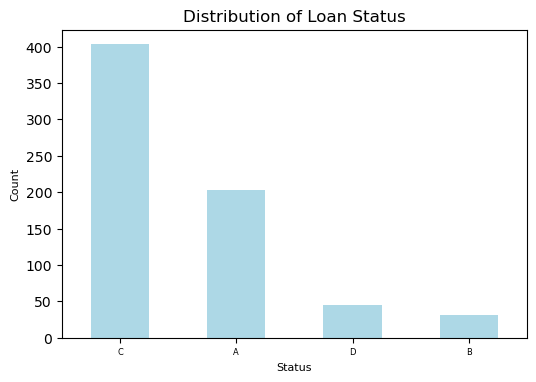

In [33]:
# Count the occurrences of each unique value in the 'status' column
status_counts = loan['status'].value_counts()

# Create a bar chart
plt.figure(figsize=(6, 4))
status_counts.plot(kind='bar', color='lightblue')

# Add chart details
plt.title('Distribution of Loan Status', fontsize=12)
plt.xlabel('Status', fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.xticks(rotation=0, fontsize=6)

# Show the plot
plt.show()

In [34]:
# Convert loan date to datetime and filter for loans granted in 1997
loan['date'] = pd.to_datetime(loan['date'], format='%y%m%d')
loan_1997 = loan[loan['date'].dt.year == 1997]

# Keep relevant columns (account_id and status)
loan_1997 = loan_1997[['account_id', 'status']]

loan_1997

,account_id,status
328,4473,C
329,10365,D
330,5724,C
331,5591,C
332,2018,A
...,...,...
519,5196,A
520,4052,C
521,5602,C
522,6157,C


#### 13.  The First Target Variable
Client had granted loan in the dependent variables time window (1997):
- 0 = did not have granted loan 
- 1 = had granted loan

In [35]:
# Convert loan date to datetime and filter for loans granted in 1997
loan['date'] = pd.to_datetime(loan['date'], format='%y%m%d')
loan_1997 = loan[loan['date'].dt.year == 1997]

# Mark accounts that received a loan in 1997
loan_1997['had_loan_1997'] = 1

# Merge with the main DataFrame
basetable = pd.merge(basetable, loan_1997[['account_id', 'had_loan_1997']], on='account_id', how='left')

# Fill NaN values with 0 for clients without a loan in 1997
basetable['had_loan_1997'] = basetable['had_loan_1997'].fillna(0).astype(int)
basetable

,account_id,bank_district_id,date,year,LOR,disp_id,client_id,client_district_id,gender,age,age_group,total_credit96,total_withdrawal96,RFM_score,total_credit97,total_withdrawal97,had_loan_1997
0,576,55,930101,1993,3,692,692,74,F,60,60,152194.6,140838.4,12,76270.7,75149.2,0
1,3818,74,930101,1993,3,4601,4601,1,M,61,60,469612.8,447070.4,11,245999.9,226375.2,0
2,704,55,930101,1993,3,844,844,22,M,51,50,457029.8,437062.4,12,228921.4,220651.2,0
3,2378,16,930101,1993,3,2873,2873,16,F,21,20,664545.4,633310.2,11,197472.3,270719.2,0
4,2632,24,930102,1993,3,3177,3177,24,M,58,50,186658.9,191071.2,9,187028.5,166171.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,4462,73,951227,1995,1,5384,5384,73,M,61,60,210483.6,187436.5,9,137901.6,157216.3,0
2235,3814,74,951227,1995,1,4596,4596,74,F,23,20,29400.0,3000.0,7,2100.0,18600.0,0
2236,2780,63,951229,1995,1,3357,3357,63,F,42,40,187419.5,154916.8,8,184351.2,163775.2,0
2237,3273,74,951229,1995,1,3962,3962,74,M,44,40,655807.8,611209.8,10,650399.6,698929.3,1


#### 14. The Second Target Variable
Client had credit card issued in the dependent variables time window (1997):
- 0 = did not have credit card issued
- 1 = had credit card issued

In [36]:
# Convert credit card issue date to datetime and filter for cards issued in 1997
card['issued'] = pd.to_datetime(card['issued'], format='mixed')
card_1997 = card[card['issued'].dt.year == 1997]

# Mark dispositions with a credit card issued in 1997
card_1997['had_card_issued_1997'] = 1

# Merge with the main DataFrame on `disp_id` to add the binary credit card variable
basetable = pd.merge(basetable, card_1997[['disp_id', 'had_card_issued_1997']], on='disp_id', how='left')

# Fill NaN values with 0 for clients without a credit card issued in 1997
basetable['had_card_issued_1997'] = basetable['had_card_issued_1997'].fillna(0).astype(int)
basetable

,account_id,bank_district_id,date,year,LOR,disp_id,client_id,client_district_id,gender,age,age_group,total_credit96,total_withdrawal96,RFM_score,total_credit97,total_withdrawal97,had_loan_1997,had_card_issued_1997
0,576,55,930101,1993,3,692,692,74,F,60,60,152194.6,140838.4,12,76270.7,75149.2,0,0
1,3818,74,930101,1993,3,4601,4601,1,M,61,60,469612.8,447070.4,11,245999.9,226375.2,0,0
2,704,55,930101,1993,3,844,844,22,M,51,50,457029.8,437062.4,12,228921.4,220651.2,0,0
3,2378,16,930101,1993,3,2873,2873,16,F,21,20,664545.4,633310.2,11,197472.3,270719.2,0,0
4,2632,24,930102,1993,3,3177,3177,24,M,58,50,186658.9,191071.2,9,187028.5,166171.2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,4462,73,951227,1995,1,5384,5384,73,M,61,60,210483.6,187436.5,9,137901.6,157216.3,0,0
2235,3814,74,951227,1995,1,4596,4596,74,F,23,20,29400.0,3000.0,7,2100.0,18600.0,0,0
2236,2780,63,951229,1995,1,3357,3357,63,F,42,40,187419.5,154916.8,8,184351.2,163775.2,0,0
2237,3273,74,951229,1995,1,3962,3962,74,M,44,40,655807.8,611209.8,10,650399.6,698929.3,1,0


##### The following visualisation of the Pie Chart and Bar Chart shows the distribution got a loan issued in 1997 among the clients.		

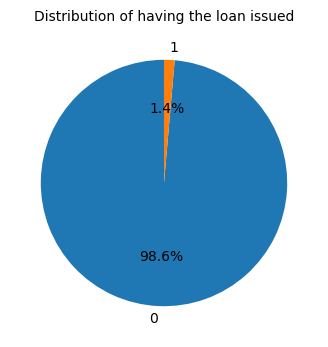

In [37]:
# Normalize value counts for LOR
ax = basetable['had_loan_1997'].value_counts(normalize=True)

# Plot as a pie chart
plt.figure(figsize=(6, 4))
ax.plot(kind='pie', autopct='%1.1f%%', startangle=90)

# Add chart details
plt.title('Distribution of having the loan issued', fontsize=10)
plt.ylabel('')  # Remove the default ylabel

# Show the plot
plt.show()

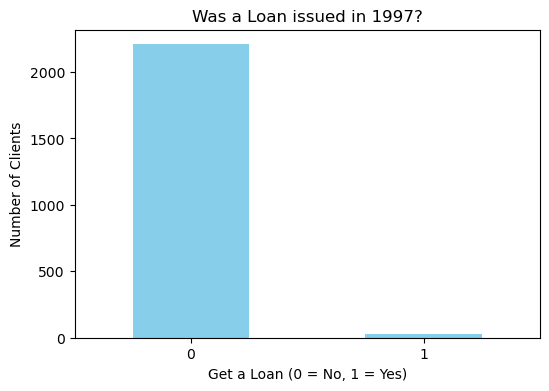

In [38]:
# Bar Chart for Loan Issuance
basetable['had_loan_1997'].value_counts().plot(kind='bar', figsize=(6, 4), color='skyblue')

plt.title('Was a Loan issued in 1997?')
plt.xlabel('Get a Loan (0 = No, 1 = Yes)')
plt.ylabel('Number of Clients')
plt.xticks(rotation=0)
plt.show()

##### The following visualisation of the Pie Chart and Bar Chart shows the distribution got a credit card issued in 1997 among the clients		

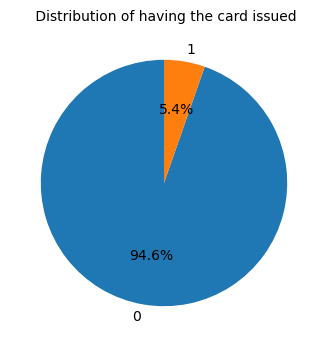

In [39]:
# Normalize value counts for credit card issued
ax = basetable['had_card_issued_1997'].value_counts(normalize=True)

# Plot as a pie chart
plt.figure(figsize=(6, 4))
ax.plot(kind='pie', autopct='%1.1f%%', startangle=90)

# Add chart details
plt.title(' Distribution of having the card issued', fontsize=10)
plt.ylabel('')  

# Show the plot
plt.show()

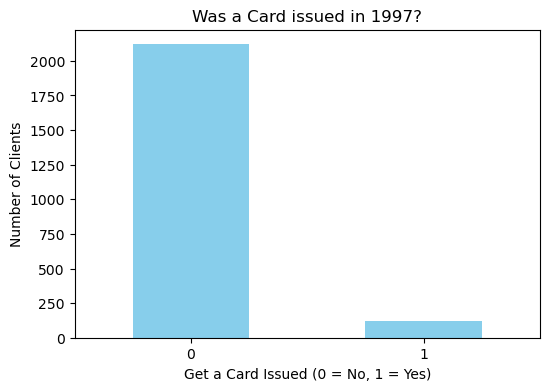

In [40]:
# Bar Chart for Card Issuance
basetable['had_card_issued_1997'].value_counts().plot(kind='bar', figsize=(6, 4), color='skyblue')

plt.title('Was a Card issued in 1997?')
plt.xlabel('Get a Card Issued (0 = No, 1 = Yes)')
plt.ylabel('Number of Clients')
plt.xticks(rotation=0)
plt.show()

## EXPORT TO A CSV FILE


In [41]:
basetable.to_excel("C:/Users/pgaillard/Desktop/finalbasetable_python.xlsx", index=False)

## PART 2
#### DESCRIPTION  TYPE OF VARIABLES

In [42]:
##TYPE OF VARIABLES
for i, col in enumerate(basetable.columns):
    print(f"{i}: {col} : {basetable[col].dtypes}")

0: account_id : int64
1: bank_district_id : int64
2: date : int64
3: year : int32
4: LOR : int32
5: disp_id : int64
6: client_id : int64
7: client_district_id : int64
8: gender : object
9: age : int32
10: age_group : int32
11: total_credit96 : float64
12: total_withdrawal96 : float64
13: RFM_score : int32
14: total_credit97 : float64
15: total_withdrawal97 : float64
16: had_loan_1997 : int32
17: had_card_issued_1997 : int32


In [43]:
print("Ratio of how many people had their loan in 1997:")
print(basetable['had_loan_1997'].value_counts(normalize=True))

print('')

print("Ratio of how many people had their credit card issued in 1997:")
print(basetable['had_card_issued_1997'].value_counts(normalize=True))

Ratio of how many people had their loan in 1997:
had_loan_1997
0    0.986155
1    0.013845
Name: proportion, dtype: float64

Ratio of how many people had their credit card issued in 1997:
had_card_issued_1997
0    0.946405
1    0.053595
Name: proportion, dtype: float64


In [44]:
print('This shows the count of each gender')
print(basetable['gender'].value_counts())
print('')
print('This shows the count of each age group')
print(basetable['age_group'].value_counts())

This shows the count of each gender
gender
M    1155
F    1084
Name: count, dtype: int64

This shows the count of each age group
age_group
20    433
30    413
40    398
50    388
60    221
10    215
70    171
Name: count, dtype: int64


In [45]:
print('This shows the count of each gender')
print(basetable['gender'].value_counts())
print('')
print('This shows the count of each age group')
print(basetable['age_group'].value_counts())

This shows the count of each gender
gender
M    1155
F    1084
Name: count, dtype: int64

This shows the count of each age group
age_group
20    433
30    413
40    398
50    388
60    221
10    215
70    171
Name: count, dtype: int64


#### The following visualization shows the Distribution of Total Credit and Total Withdrawal of the year 1996 and 1997 with a Box Plot and Bar Chart.

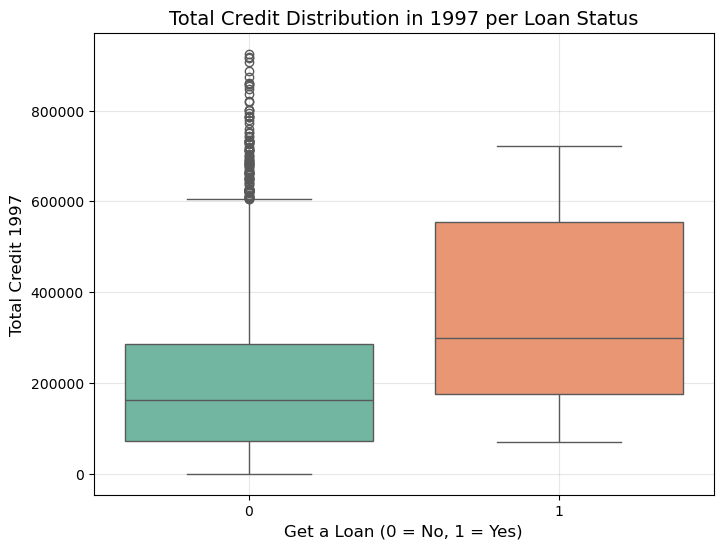

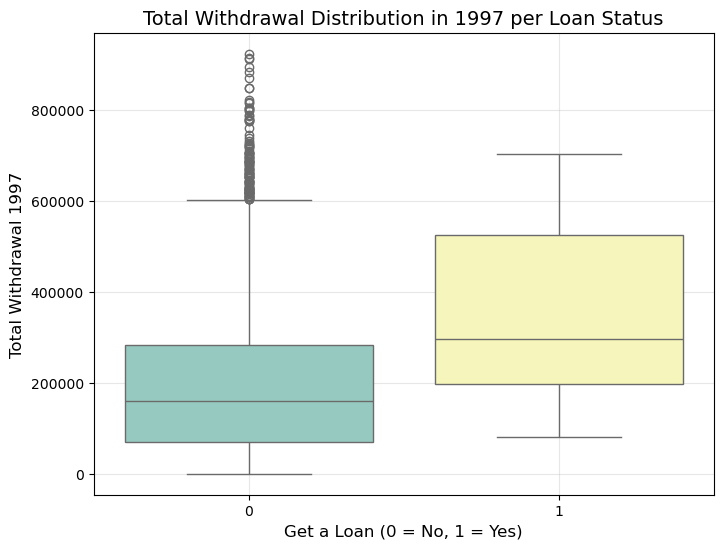

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for total_credit97
plt.figure(figsize=(8, 6))
sns.boxplot(data=basetable, x='had_loan_1997', y='total_credit97', palette='Set2')
plt.title("Total Credit Distribution in 1997 per Loan Status", fontsize=14)
plt.xlabel("Get a Loan (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Total Credit 1997", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Boxplot for total_withdrawal97
plt.figure(figsize=(8, 6))
sns.boxplot(data=basetable, x='had_loan_1997', y='total_withdrawal97', palette='Set3')
plt.title("Total Withdrawal Distribution in 1997 per Loan Status", fontsize=14)
plt.xlabel("Get a Loan (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Total Withdrawal 1997", fontsize=12)
plt.grid(alpha=0.3)
plt.show()




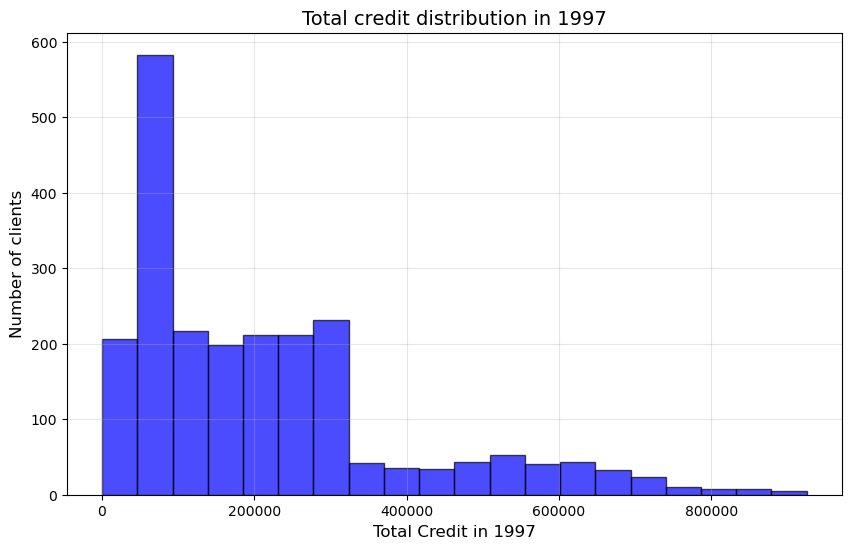

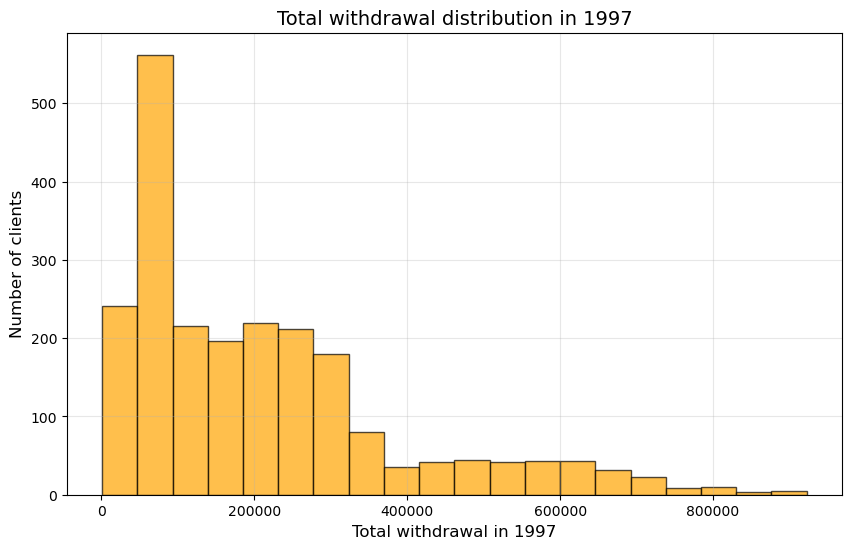

In [47]:
# Bar Chart for total_credit97
plt.figure(figsize=(10, 6))
plt.hist(basetable['total_credit97'], bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title("Total credit distribution in 1997", fontsize=14)
plt.xlabel("Total Credit in 1997", fontsize=12)
plt.ylabel("Number of clients", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Bar Chart for total_withdrawal97
plt.figure(figsize=(10, 6))
plt.hist(basetable['total_withdrawal97'], bins=20, color='orange', edgecolor='black', alpha=0.7)
plt.title("Total withdrawal distribution in 1997", fontsize=14)
plt.xlabel("Total withdrawal in 1997", fontsize=12)
plt.ylabel("Number of clients", fontsize=12)
plt.grid(alpha=0.3)
plt.show()



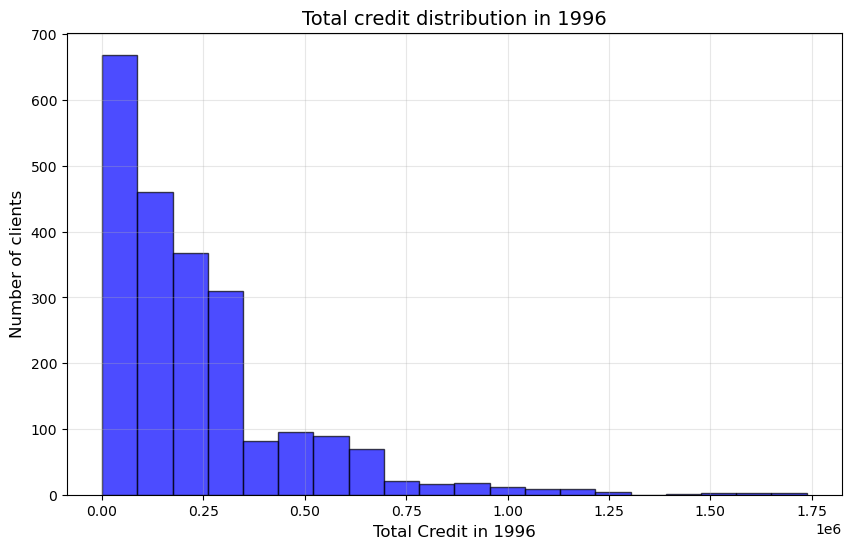

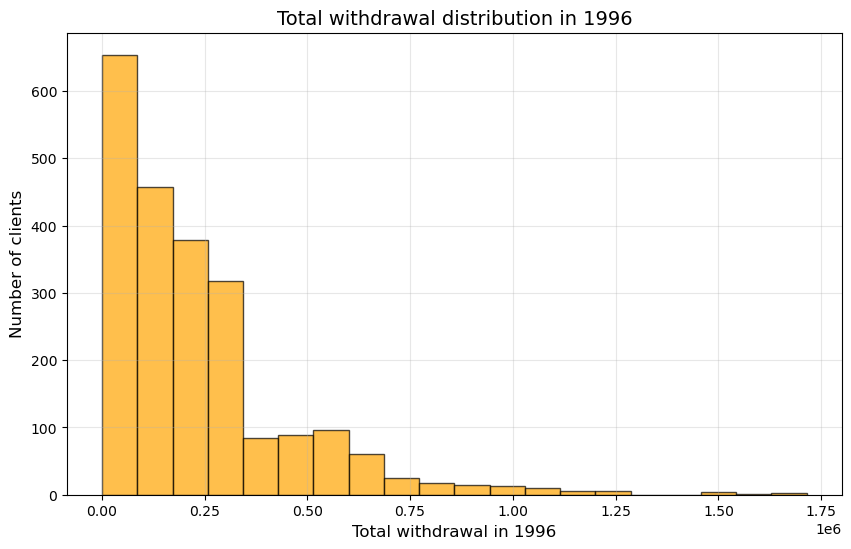

In [48]:
# Bar Chart for total_credit96
plt.figure(figsize=(10, 6))
plt.hist(basetable['total_credit96'], bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title("Total credit distribution in 1996", fontsize=14)
plt.xlabel("Total Credit in 1996", fontsize=12)
plt.ylabel("Number of clients", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Bar Chart for total_withdrawal96
plt.figure(figsize=(10, 6))
plt.hist(basetable['total_withdrawal96'], bins=20, color='orange', edgecolor='black', alpha=0.7)
plt.title("Total withdrawal distribution in 1996", fontsize=14)
plt.xlabel("Total withdrawal in 1996", fontsize=12)
plt.ylabel("Number of clients", fontsize=12)
plt.grid(alpha=0.3)
plt.show()